In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
n_samples = 1000
constraint = 'ordered'  # 'ordered', 'contiguous', or 'none'
final_framework = pd.read_csv(f'test_final_{constraint}_git_{500}samples.csv', sep=';')
sloth_LCS = pd.read_csv(f'test_sloth_{constraint}_git_{n_samples}samples.csv', sep=';')[:500]
sloth_mapping = pd.read_csv(f'test_mapping_{constraint}_git_{n_samples}samples.csv', sep=';')[:500]
sloth = pd.read_csv(f'test_sloth_git_{2000}samples.csv', sep=';')[:500]

print(f'len(final_framework): {len(final_framework)}')
print(f'len(sloth_LCS): {len(sloth_LCS)}')
print(f'len(sloth_mapping): {len(sloth_mapping)}')
print(f'len(sloth): {len(sloth)}')


len(final_framework): 500
len(sloth_LCS): 500
len(sloth_mapping): 500
len(sloth): 500


In [10]:
def summary_stats(data):
    return {
        "min": round(np.min(data), 3),
        "max": round(np.max(data), 3),
        "mean": round(np.mean(data), 3),
        "std_dev": round(np.std(data), 3),
        "positive_ratio": round(np.sum(data > 0) / len(data), 3),
        "negative_ratio": round(np.sum(data < 0) / len(data), 3),
        "zero_ratio": round(np.sum(data == 0) / len(data), 3),
    }

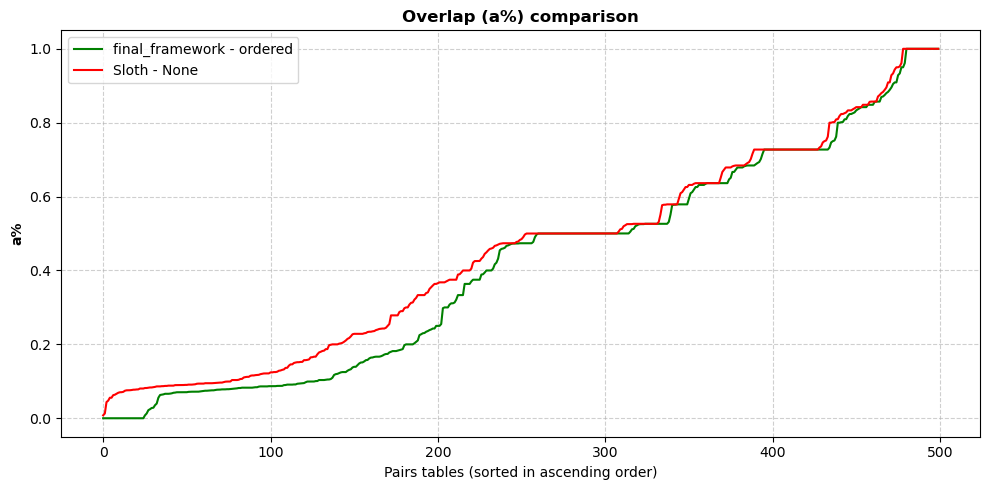

In [15]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
sloth_ord = sloth.sort_values(by='a%')
final_framework_ord = final_framework.sort_values(by='a%')
# final_framework_ord = final_framework.loc[sloth_ord.index]

# sloth_ord = sloth.sort_values(by='a%')
plt.plot(final_framework_ord['a%'].values, color='green', label=f'final_framework - {constraint}', markersize=4)
plt.plot(sloth_ord['a%'].values, color='red', label=f'Sloth - None', markersize=4)

plt.title("Overlap (a%) comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.ylabel("a%", fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
print("=== final_framework ===")
final_framework_stats = summary_stats(final_framework['a%'].values)
for k, v in final_framework_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH ===")
sloth_stats = summary_stats(sloth['a%'].values)
for k, v in sloth_stats.items():
    print(f"{k}: {v}")

=== final_framework ===
min: 0.0
max: 1.0
mean: 0.414
std_dev: 0.297
positive_ratio: 0.95
negative_ratio: 0.0
zero_ratio: 0.05

=== SLOTH ===
min: 0.008
max: 1.0
mean: 0.447
std_dev: 0.278
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0


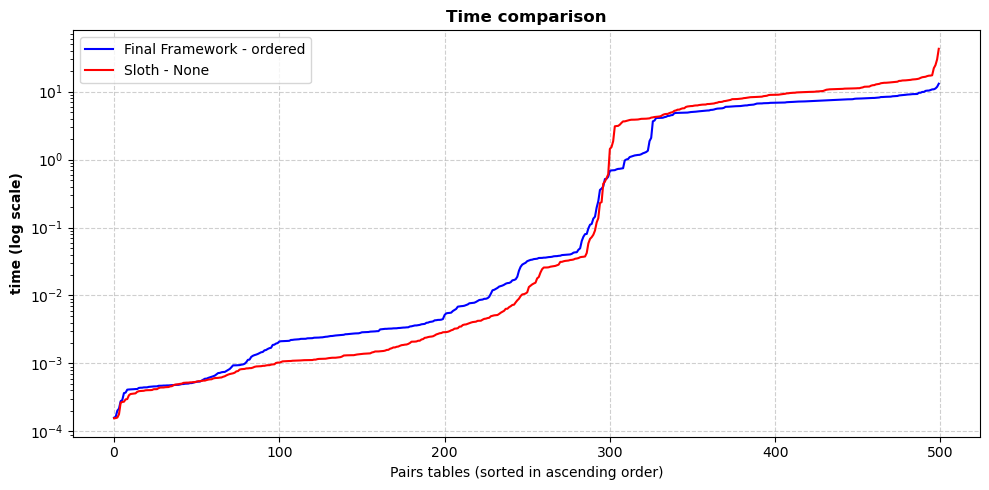

In [5]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
sloth_LCS_ord = sloth_LCS.sort_values(by='time')
final_framework_ord = final_framework.sort_values(by='time')
sloth_mapping_ord = sloth_mapping.sort_values(by='time')
sloth_ord = sloth.sort_values(by='time')

plt.plot(final_framework_ord['time'].values, color='blue', label=f'Final Framework - {constraint}', markersize=4)
# plt.plot(sloth_LCS_ord['time'].values, color='orange', label=f'LCS-Based - {constraint}', markersize=4)
# plt.plot(sloth_mapping_ord['time'].values, color='green', label=f'Mapping-Based - {constraint}', markersize=4)
plt.plot(sloth_ord['time'].values, color='red', label=f'Sloth - None', markersize=4)

plt.title("Time comparison", fontweight='bold')
plt.yscale('log')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.ylabel("time (log scale)", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
print("=== final_framework ===")
final_framework_stats = summary_stats(final_framework['time'].values)
for k, v in final_framework_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH ===")
sloth_stats = summary_stats(sloth['time'].values)
for k, v in sloth_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH LCS ===")
sloth_LCS_stats = summary_stats(sloth_LCS['time'].values)
for k, v in sloth_LCS_stats.items():
    print(f"{k}: {v}")
    
print("\n=== SLOTH Mapping ===")
sloth_mapping_stats = summary_stats(sloth_mapping['time'].values)
for k, v in sloth_mapping_stats.items():
    print(f"{k}: {v}")


=== final_framework ===
min: 0.0
max: 13.066
mean: 2.517
std_dev: 3.46
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0

=== SLOTH ===
min: 0.0
max: 42.647
mean: 3.735
std_dev: 5.487
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0

=== SLOTH LCS ===
min: 0.0
max: 11.155
mean: 2.558
std_dev: 3.358
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0

=== SLOTH Mapping ===
min: 0.0
max: 14.829
mean: 3.31
std_dev: 4.091
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0
